<a href="https://colab.research.google.com/github/paulandrea0/AutoEncoder-Representacion-Se-ales/blob/main/Identifica%C3%A7%C3%A3o_curtos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [8]:
import pandas as pd
ruta = '/gdrive/MyDrive/Andrea Santos/Banco de dados-V3.xlsx'


# Carga la hoja 'Curto-Monofásico' en un DataFrame
nombre= 'Curto-Monofásico'
df_mono = pd.read_excel(ruta, sheet_name=nombre)
df_mono.rename(columns={"Unnamed: 5": 'valor'}, inplace=True)
# Imprime las primeras filas de la hoja 'Curto-Monofásico'
print(f"\nPrimeras filas de la hoja '{nombre}':")
print(df_mono.head())

# Carga la hoja 'Curto-Bifásico' en un DataFrame
nombre= 'Curto-Bifásico'
df_bi = pd.read_excel(ruta, sheet_name=nombre)
df_bi.rename(columns={"Unnamed: 11": 'vazio'}, inplace=True)
# Imprime las primeras filas de la hoja 'Curto-Bifásico'
print(f"\nPrimeras filas de la hoja '{nombre}':")
print(df_bi.head())

# Carga la hoja 'Curto-Trifásico' en un DataFrame
nombre= 'Curto-Trifásico'
df_tri = pd.read_excel(ruta, sheet_name=nombre)
df_tri.rename(columns={"Unnamed: 5": 'valor'}, inplace=True)
# Imprime las primeras filas de la hoja 'Trifásico'
print(f"\nPrimeras filas de la hoja '{nombre}':")
print(df_tri.head())


Primeras filas de la hoja 'Curto-Monofásico':
   ITEM Curto Tipo de GD  Barra  Ângulo Resistência   valor       d_A  \
0   1.0    Bg         PV    806                  NaN      0 -0.992379   
1   2.0    Ag         PV    806                  NaN      1  0.906638   
2   3.0    Cg         PV    806                  NaN      0  0.082423   
3   4.0    Bg         PV    806                  NaN      0 -0.991735   
4   5.0    Ag         PV    806                  NaN      4  0.882043   

        d_B       d_C     Med_A     Med_B     Med_C  FASE A  FASE B  FASE C  
0  0.912564  0.079814  0.085963  0.837879  0.076158       0       1       0  
1  0.082961 -0.989599  0.841008  0.075763  0.083229       1       0       0  
2 -0.988532  0.906109  0.083535  0.089299  0.827166       0       0       1  
3  0.925870  0.065865  0.088309  0.835994  0.075697       0       1       0  
4  0.104455 -0.986498  0.830501  0.080201  0.089298       1       0       0  

Primeras filas de la hoja 'Curto-Bifásico':
 

#SEPARAÇÃO DE DADOS POR TIPO DE CURTO E TIPO GERAÇÃO DISTRIBUIDA

In [17]:
conteo_pv = df_mono['Tipo de GD'].value_counts()
print("Conteo de tipos 'PV' en la columna 'Tipo de GD':\n", conteo_pv)

Conteo de tipos 'PV' en la columna 'Tipo de GD':
 Tipo de GD
Sem GD    673
2PV       673
PV        672
3PV       672
Name: count, dtype: int64


In [19]:
import numpy as np
np.set_printoptions(suppress=False)


grupos_pv = df_mono.groupby('Tipo de GD')    # Agrupar el DataFrame por el tipo de GD
dataframes_separados = {}               # Crear un diccionario para almacenar los DataFrames separados

for tipo, grupo in grupos_pv:           # Iterar sobre cada grupo y crear un DataFrame separado para cada tipo de PV
    dataframes_separados[tipo] = grupo

df_pv1 = dataframes_separados['PV']    # Acceder a los DataFrames separados por tipo de PV
df_pv2 = dataframes_separados['2PV']
df_pv3 = dataframes_separados['3PV']
df_sem = dataframes_separados['Sem GD']

pv1 = df_pv1.iloc[:, -6:]
pv1 = pv1.to_numpy()
pv2 = df_pv2.iloc[:, -6:]
pv2 = pv2.to_numpy()
pv3 = df_pv3.iloc[:, -6:]
pv3 = pv3.to_numpy()
sem = df_sem.iloc[:, -6:]
sem = sem.to_numpy()



# grupos_pv = df_bi.groupby('Tipo de GD')    # Agrupar el DataFrame por el tipo de GD
# dataframes_separados = {}               # Crear un diccionario para almacenar los DataFrames separados

# for tipo, grupo in grupos_pv:           # Iterar sobre cada grupo y crear un DataFrame separado para cada tipo de PV
#     dataframes_separados[tipo] = grupo

# df_pv1 = dataframes_separados['PV']    # Acceder a los DataFrames separados por tipo de PV
# df_pv2 = dataframes_separados['2PV']
# df_pv3 = dataframes_separados['3PV']
# df_sem = dataframes_separados['Sem GD']
# pv1 = df_pv1.iloc[:, 5:11]
# pv1 = pv1.to_numpy()
# pv2 = df_pv2.iloc[:, 5:11]
# pv2 = pv2.to_numpy()
# pv3 = df_pv3.iloc[:, 5:11]
# pv3 = pv3.to_numpy()
# sem = df_sem.iloc[:, 5:11]
# sem = sem.to_numpy()



# grupos_pv = df_tri.groupby('Tipo de GD')    # Agrupar el DataFrame por el tipo de GD
# dataframes_separados = {}               # Crear un diccionario para almacenar los DataFrames separados

# for tipo, grupo in grupos_pv:           # Iterar sobre cada grupo y crear un DataFrame separado para cada tipo de PV
#     dataframes_separados[tipo] = grupo

# df_pv1 = dataframes_separados['PV']    # Acceder a los DataFrames separados por tipo de PV
# df_pv2 = dataframes_separados['2PV']
# df_pv3 = dataframes_separados['3PV']
# df_sem = dataframes_separados['Sem GD']
# pv1 = df_pv1.iloc[:, 6:12]
# pv1 = pv1.to_numpy()
# pv2 = df_pv2.iloc[:, 6:12]
# pv2 = pv2.to_numpy()
# pv3 = df_pv3.iloc[:, 6:12]
# pv3 = pv3.to_numpy()
# sem = df_sem.iloc[:, 6:12]
# sem = sem.to_numpy()

In [20]:
print(pv1.shape, pv2.shape, pv3.shape, sem.shape)

(672, 6) (673, 6) (672, 6) (673, 6)


Contando as classes dos cortos Monofásicos apartir do meu dataframe (Curtos nas fases A, B o C)

In [22]:
pv1

array([[0.08596305, 0.83787872, 0.07615823, 0.        , 1.        ,
        0.        ],
       [0.84100843, 0.07576265, 0.08322892, 1.        , 0.        ,
        0.        ],
       [0.08353488, 0.08929883, 0.8271663 , 0.        , 0.        ,
        1.        ],
       ...,
       [0.19497136, 0.61891312, 0.18611552, 0.        , 1.        ,
        0.        ],
       [0.60807082, 0.19750599, 0.19442318, 1.        , 0.        ,
        0.        ],
       [0.13248915, 1.        , 0.11520319, 0.        , 1.        ,
        0.        ]])

Só conferindo quantidade de classes A, B ou C por cada tipo de GD

In [25]:
num_clase_A = np.sum(pv1[:, -3])  # Sumar valores de la columna -3 (clase A)
num_clase_B = np.sum(pv1[:, -2])  # Sumar valores de la columna -2 (clase B)
num_clase_C = np.sum(pv1[:, -1])  # Sumar valores de la última columna (clase C)
print("Cantidad de datos para la clase A(PV1):", num_clase_A), print("Cantidad de datos para la clase B(PV1):", num_clase_B), print("Cantidad de datos para la clase C(PV1):", num_clase_C)

num_clase_A = np.sum(pv2[:, -3])  # Sumar valores de la columna -3 (clase A)
num_clase_B = np.sum(pv2[:, -2])  # Sumar valores de la columna -2 (clase B)
num_clase_C = np.sum(pv2[:, -1])  # Sumar valores de la última columna (clase C)
print("Cantidad de datos para la clase A(PV2):", num_clase_A), print("Cantidad de datos para la clase B(PV2):", num_clase_B), print("Cantidad de datos para la clase C(PV2):", num_clase_C)

num_clase_A = np.sum(pv3[:, -3])  # Sumar valores de la columna -3 (clase A)
num_clase_B = np.sum(pv3[:, -2])  # Sumar valores de la columna -2 (clase B)
num_clase_C = np.sum(pv3[:, -1])  # Sumar valores de la última columna (clase C)
print("Cantidad de datos para la clase A(PV3):", num_clase_A), print("Cantidad de datos para la clase B(PV3):", num_clase_B), print("Cantidad de datos para la clase C(PV3):", num_clase_C)
num_clase_A = np.sum(sem[:, -3])  # Sumar valores de la columna -3 (clase A)
num_clase_B = np.sum(sem[:, -2])  # Sumar valores de la columna -2 (clase B)
num_clase_C = np.sum(sem[:, -1])  # Sumar valores de la última columna (clase C)
print("Cantidad de datos para la clase A(sem GD):", num_clase_A), print("Cantidad de datos para la clase B(sem GD):", num_clase_B), print("Cantidad de datos para la clase C(sem GD):", num_clase_C)

Cantidad de datos para la clase A(PV1): 216.0
Cantidad de datos para la clase B(PV1): 229.0
Cantidad de datos para la clase C(PV1): 227.0
Cantidad de datos para la clase A(PV2): 225.0
Cantidad de datos para la clase B(PV2): 223.0
Cantidad de datos para la clase C(PV2): 225.0
Cantidad de datos para la clase A(PV3): 224.0
Cantidad de datos para la clase B(PV3): 224.0
Cantidad de datos para la clase C(PV3): 224.0
Cantidad de datos para la clase A(sem GD): 226.0
Cantidad de datos para la clase B(sem GD): 224.0
Cantidad de datos para la clase C(sem GD): 223.0


(None, None, None)

Gerando o set de treinamento e teste a partir dos dados Monofásico por cada tipo de GD

In [ ]:
from sklearn.model_selection import train_test_split


# Dividir la matriz y la clase en conjuntos de entrenamiento y prueba (80/20)
clase = X1[:, -3:]
x_train, x_test, y_train, y_test = train_test_split(X1[:, 0:3], clase, test_size=0.5, random_state=42, stratify=clase)

# Imprimir el tamaño de los conjuntos de entrenamiento y prueba
print("Tamaño de x_train:", x_train.shape)
print("Tamaño de y_train:", y_train.shape)

Tamaño de x_train: (1345, 3)
Tamaño de y_train: (1345, 3)
Tamaño de x_test: (1345, 3)
Tamaño de y_test: (1345, 3)


**Separamos el set de entrenamiento por clase** para treinar o Autoencoder só com uma das classes.

Clase A

In [ ]:
A_train = x_train[y_train[:,0] == 1]
A_test = x_test[y_test[:,0] == 1]
print("Dimensiones de A_train:", A_train.shape)
print("Dimensiones de A_test:", A_test.shape)

Dimensiones de A_train: (446, 3)
Dimensiones de A_test: (445, 3)


Classe B

In [ ]:
B_train = x_train[y_train[:,1] == 1]
B_test = x_test[y_test[:,1] == 1]
print("Dimensiones de A_train:", B_train.shape)
print("Dimensiones de A_test:", B_test.shape)

Dimensiones de A_train: (450, 3)
Dimensiones de A_test: (450, 3)


Classe C

In [ ]:
C_train = x_train[y_train[:,2] == 1]
C_test = x_test[y_test[:,2] == 1]
print("Dimensiones de A_train:", C_train.shape)
print("Dimensiones de A_test:", C_test.shape)

Dimensiones de A_train: (449, 3)
Dimensiones de A_test: (450, 3)


# Treinamento Autoencoder com dados da classe A

Autoencoder_A

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
#np.random.seed(23)

dim_entrada = A_train.shape[1]
entrada = Input(shape=(dim_entrada,))

# Encoder
encoder = Dense(2, activation='relu')(entrada)
encoder = Dense(1, activation='relu')(encoder)

# Decoder
decoder = Dense(2, activation='relu')(encoder)
decoder = Dense(3, activation='sigmoid')(decoder)

# Autoencoder = entrada + decoder (que ya contiene el encoder)
autoencoder_A = Model(inputs=entrada, outputs=decoder)

autoencoder_A.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_8 (Dense)             (None, 2)                 8         
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
 dense_10 (Dense)            (None, 2)                 4         
                                                                 
 dense_11 (Dense)            (None, 3)                 9         
                                                                 
Total params: 24 (96.00 Byte)
Trainable params: 24 (96.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Optimización y Entrenamiento

In [ ]:
autoencoder_A.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
historia = autoencoder_A.fit(A_train, A_train,
          epochs=20,
          batch_size=50,
          validation_data=(A_test, A_test),
          shuffle=True)

Epoch 1/20
9/9 [==============================] - 1s 28ms/step - loss: 0.2477 - accuracy: 1.0000 - val_loss: 0.2531 - val_accuracy: 0.9978
Epoch 2/20
9/9 [==============================] - 0s 9ms/step - loss: 0.2460 - accuracy: 1.0000 - val_loss: 0.2513 - val_accuracy: 0.9978
Epoch 3/20
9/9 [==============================] - 0s 7ms/step - loss: 0.2442 - accuracy: 1.0000 - val_loss: 0.2496 - val_accuracy: 0.9978
Epoch 4/20
9/9 [==============================] - 0s 9ms/step - loss: 0.2424 - accuracy: 1.0000 - val_loss: 0.2479 - val_accuracy: 0.9978
Epoch 5/20
9/9 [==============================] - 0s 8ms/step - loss: 0.2407 - accuracy: 1.0000 - val_loss: 0.2462 - val_accuracy: 0.9978
Epoch 6/20
9/9 [==============================] - 0s 8ms/step - loss: 0.2390 - accuracy: 1.0000 - val_loss: 0.2445 - val_accuracy: 0.9978
Epoch 7/20
9/9 [==============================] - 0s 8ms/step - loss: 0.2373 - accuracy: 1.0000 - val_loss: 0.2427 - val_accuracy: 0.9978
Epoch 8/20
9/9 [=================

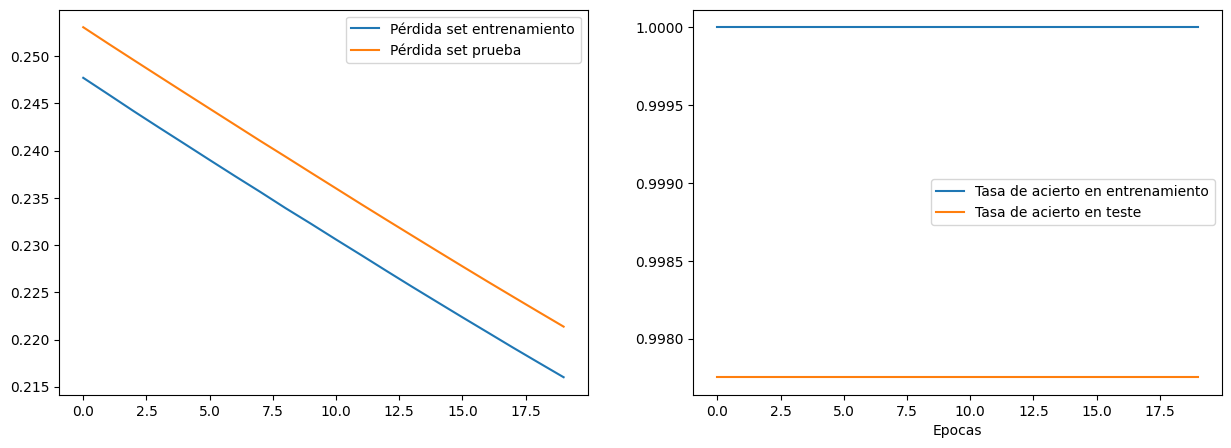

In [ ]:
import matplotlib.pyplot as plt
plt.figure(5, figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historia.history["loss"], label="Pérdida set entrenamiento")
plt.plot(historia.history["val_loss"], label="Pérdida set prueba")
plt.legend()
plt.subplot(1,2,2)
plt.plot(historia.history["accuracy"], label="Tasa de acierto en entrenamiento")
plt.plot(historia.history["val_accuracy"], label="Tasa de acierto en teste")
plt.xlabel('Epocas')
plt.legend()

Conferindo a Reconstrução dos dados de Clase A, com outros dados de classe B e C

Formando conjunto de dados de fases B e C

Concatenando os dados das fases B e C

In [ ]:
fase_B_C = np.vstack((B_test, C_test))
print(fase_B_C.shape)

(900, 3)


Observando o Modelo Autoencoder_A quando tem que reconstruir dados das classes B e C

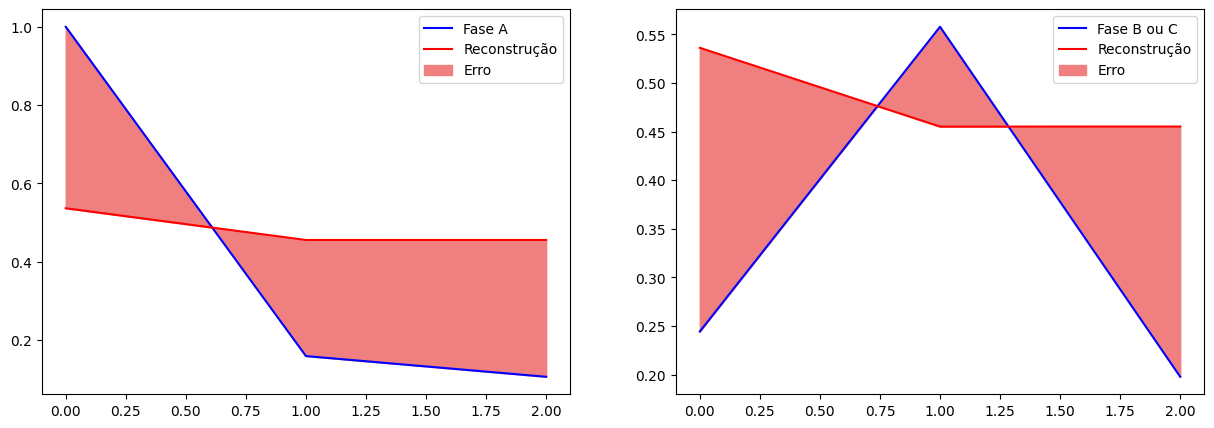

In [ ]:
import random

# ¿Qué tan bien reconstruye un dato "normal" y uno anormal?
rec_normal = autoencoder_A(A_test).numpy()
rec_anormal = autoencoder_A(fase_B_C).numpy()

dato =  random.randint(1, 450)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(A_test[dato],'b')
plt.plot(rec_normal[dato],'r')
plt.fill_between(np.arange(3), rec_normal[dato], A_test[dato], color='lightcoral')
plt.legend(labels=["Fase A", "Reconstrução", "Erro"])
plt.subplot(1,2,2)
plt.plot(fase_B_C[dato],'b')
plt.plot(rec_anormal[dato],'r')
plt.fill_between(np.arange(3), rec_anormal[dato], fase_B_C[dato], color='lightcoral')
plt.legend(labels=["Fase B ou C", "Reconstrução", "Erro"])

Calculando o Erro de reconstrução

In [ ]:
# Distribuciones de los errores de construcción
# para cada categoría
import tensorflow as tf

rec_1 = autoencoder_A.predict(A_test)
rec_2 = autoencoder_A.predict(fase_B_C)


loss_1 = tf.keras.losses.mae(rec_1, A_test)
loss_2 = tf.keras.losses.mae(rec_2, fase_B_C)

umbral = np.mean(loss_1) + np.std(loss_1)
print("Umbral: ", umbral)

plt.figure(figsize=(15,8))
plt.hist(loss_1[None,:], bins=200, alpha=0.75, label='Fase A')
plt.hist(loss_2[None,:], bins=200, alpha=0.5, color='#ff521b', label='Fases B e C')

plt.xlabel('Pérdidas (MAE)')
plt.ylabel('Nro. ejemplos')
plt.legend(loc='upper right')
plt.vlines(umbral,0,60,'k')

In [ ]:
# Calcular predicciones individuales
def predecir(modelo, datos, umbral):
  reconstrucciones = modelo(datos)
  perdida = tf.keras.losses.mae(reconstrucciones, datos)
  return tf.math.less(perdida, umbral)

def calcular_sensitividad(prediccion, titulo):
  TP = np.count_nonzero(~prediccion)
  FN = np.count_nonzero(prediccion)
  sen = 100*(TP/(TP+FN))

  print(titulo + ': {:.1f}%'.format(sen))

def calcular_especificidad(prediccion, titulo):
  TN = np.count_nonzero(prediccion)
  FP = np.count_nonzero(~prediccion)
  esp = 100*(TN/(TN+FP))

  print(titulo + ': {:.1f}%'.format(esp))
  return esp

In [ ]:
# Predicciones
pred_A = predecir(autoencoder_A, A_test, umbral)
pred_B = predecir(autoencoder_A, B_train, umbral)
pred_C = predecir(autoencoder_A, C_train, umbral)


# Pred1: especificidad
esp_1 = calcular_especificidad(pred_A,'Especificidad (Fase A)')

# Pred 2 a 5: sensitividad
sen_2 = calcular_sensitividad(pred_B,'Sensitividad (Fase B)')
sen_3 = calcular_sensitividad(pred_C,'Sensitividad (Fase C)')


Especificidad (Fase A): 75.8%
Sensitividad (Fase B): 31.0%
Sensitividad (Fase C): 31.6%


In [ ]:
pred_C

<tf.Tensor: shape=(719,), dtype=bool, numpy=
array([ True, False,  True,  True, False,  True,  True, False,  True,
        True,  True,  True, False,  True, False,  True, False,  True,
        True,  True,  True, False, False,  True, False,  True, False,
       False,  True,  True,  True, False, False, False, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False,  True,  True, False,
       False,  True,  True,  True,  True,  True, False, False,  True,
        True, False,  True, False,  True,  True, False, False,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True,  True, False, False,
        True, False,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True, False,  True, False,  True, False,
        True, False,  True,  True, False,  Tr

Até aqui a classe de dados da Fase A pode ser separados.

# Treinando Autoencoder para separar Fases B e C

Obtendo os dados que foram classificados como fases B e C no Autoencoder A

In [ ]:
# # B_pred = B_train[pred_B[0] == True]
# indices_B_pred = np.flatnonzero(pred_B[0] == True)
# B_pred = B_train[indices_B_pred]

C_pred = C_train[pred_C == True]
# indices_C_pred = np.flatnonzero(pred_C[0] == True)
# C_pred = C_train[indices_C_pred]

In [ ]:
print(pred_C.shape)

(719,)
